In [2]:
import numpy as np
from cvxopt import solvers, lapack, matrix, spmatrix


In [42]:

solvers.options['show_progress'] = 1

m = 6 # Number of data points
n = 1 # Number of variables
tt = np.arange(1.0, m+1)
yy = np.array([8.49, 20.05, 50.65, 72.19, 129.85, 171.56])
#yy[3] += 100
varphi = np.power(tt, 2)/2
varphi.shape = (m, 1)

A = matrix(varphi)
b = matrix(yy)

# Least squares solution.
xls = np.dot( np.linalg.inv(np.dot(varphi.T, varphi)), np.dot(varphi.T, yy) )
# Or
xls = np.linalg.lstsq(varphi, yy)
# Or
xls = +b
lapack.gels(+A, xls)
xls = xls[:1]

# Robust least squares.
#
# minimize  sum( h( A*x-b ))
#
# where h(u) = u^2           if |u| <= 1.0
#            = 2*(|u| - 1.0) if |u| > 1.0.
#
# Solve as a QP (see exercise 4.5):
#
# minimize    (1/2) * u'*u + 1'*v
# subject to  -u - v <= A*x-b <= u + v
#             0 <= u <= 1
#             v >= 0
#
# Variables  x (n), u (m), v(m)

novars = n+2*m
P = spmatrix([],[],[], (novars, novars))
P[n:n+m,n:n+m] = spmatrix(1.0, range(m), range(m))
q = matrix(0.0, (novars,1))
q[-m:] = 1.0

G = spmatrix([], [], [], (5*m, novars))
h = matrix(0.0, (5*m,1))

# A*x - b <= u+v
G[:m,:n] = A
G[:m,n:n+m] = spmatrix(-1.0, range(m), range(m))
G[:m,n+m:] = spmatrix(-1.0, range(m), range(m))
h[:m] = b

# -u - v <= A*x - b
G[m:2*m,:n] = -A
G[m:2*m,n:n+m] = spmatrix(-1.0, range(m), range(m))
G[m:2*m,n+m:] = spmatrix(-1.0, range(m), range(m))
h[m:2*m] = -b

# u >= 0
G[2*m:3*m,n:n+m] = spmatrix(-1.0, range(m), range(m))

# u <= 1
G[3*m:4*m,n:n+m] = spmatrix(1.0, range(m), range(m))
h[3*m:4*m] = 1.0

# v >= 0
G[4*m:,n+m:] = spmatrix(-1.0, range(m), range(m))

xh = solvers.qp(P, q, G, h)['x'][:n]

print "Least squares solution: g_LS = %f" % xls[0]
print "Huber solution: g_H = %f" % xh[0]


     pcost       dcost       gap    pres   dres
 0: -3.1983e+00  3.4609e+02  2e+03  1e-01  3e+01
 1:  4.6834e+01 -3.0100e+01  8e+01  1e-03  3e-01
 2:  2.6898e+01  1.6935e+01  1e+01  1e-04  3e-02
 3:  2.4987e+01  2.3451e+01  2e+00  2e-05  4e-03
 4:  2.4598e+01  2.4473e+01  1e-01  4e-07  9e-05
 5:  2.4548e+01  2.4535e+01  1e-02  8e-17  1e-13
 6:  2.4542e+01  2.4541e+01  2e-03  1e-16  1e-13
 7:  2.4542e+01  2.4541e+01  2e-04  9e-17  1e-12
 8:  2.4542e+01  2.4542e+01  3e-05  8e-17  2e-12
 9:  2.4542e+01  2.4542e+01  4e-06  5e-17  3e-12
Optimal solution found.
Least squares solution: g_LS = 9.777574
Huber solution: g_H = 9.566098


In [28]:
b

<6x1 matrix, tc='d'>

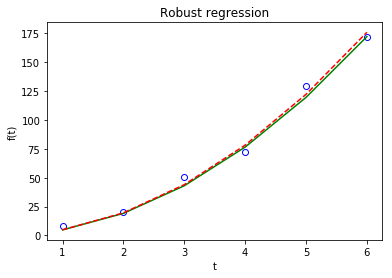

In [29]:
import pylab
pylab.figure(1,facecolor='w')
pylab.plot(tt,yy,'o',
        tt, varphi*xh[0], '-g',
        tt, varphi*xls[0], '--r',
        markerfacecolor='w', markeredgecolor='b')
#pylab.axis([-11, 11, -20, 25])
pylab.xlabel('t')
pylab.ylabel('f(t)')
pylab.title('Robust regression')
pylab.show()

In [32]:
a = +b

In [33]:
a

<6x1 matrix, tc='d'>

In [34]:
a[2]

50.65

In [35]:
a[2] += 3

In [37]:
b[2]

50.65